# Principal Component Analysis

- PCA reduces the dimensionality of large datasets while preserving as much variance (information) as possible.
- It transforms original variables into new, uncorrelated variables called principal components.
- These components are ordered so that the first captures the most variance, the second the next most, and so on.

**Steps**
1. Standardization
2. Covariance Matrix Computation
3. Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components
4. Create a Feature Vector
   * here we create anothe matrix with eigen vectors, here we can choose to have how many eigen vectrs should be used to form this Feature Vector,
   * Discarding a eigen vector reduces the dimensionality by 1
5. Recast the Data along the Principal Components Axes


In [2]:
import pandas as pd

In [4]:
df=pd.read_csv(r"C:\Users\PHANEENDRA\Downloads\Cranes ML\wine_data.csv")
df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [9]:
df.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [11]:
x=df.drop(columns='Class')
y=df['Class']

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [30]:
x

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [15]:
from sklearn.decomposition import PCA
pca=PCA()
x_pca=pca.fit_transform(x)

In [32]:
x_pca

array([[ 3.31675081e+00,  1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00, -3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00,  1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00,  2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00,  2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00,  2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [17]:
explained_variance_ratio=pca.explained_variance_ratio_

In [22]:
explained_variance_ratio

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

Text(0, 0.5, 'Explained Variance Ratio')

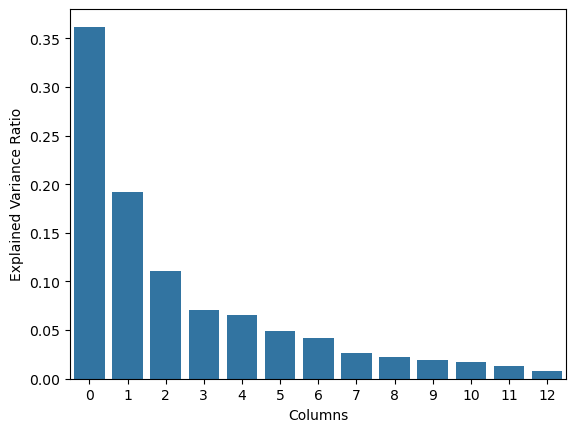

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(explained_variance_ratio)
plt.xlabel('Columns')
plt.ylabel('Explained Variance Ratio')

In [36]:
pca2=PCA(n_components=3)
x_pca2=pca2.fit_transform(x)

In [38]:
x_pca2

array([[ 3.31675081e+00,  1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00, -3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00,  1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00,  2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00,  8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00,  2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00,  1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00,  1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00,  9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00,  7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00,  1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00,  6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00,  6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00,  1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00,  2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00,  1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00,  2.32730534e+00

In [44]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_pca2,y,test_size=0.2,random_state=1)

In [46]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [48]:
lr.score(xtrain,ytrain)

0.9859154929577465

In [50]:
lr.score(xtest,ytest)

0.9722222222222222